### OICM Inference for models deployed with: OI SERVE
##### sequence-classification

In [40]:
import requests
import json
import os

In [9]:
api_key = os.getenv('OI_API_KEY') # Your valid api key
model_version_id = os.getenv('OI_MODEL_VERSION_ID') # model version id
base_url =f"" # your valid model url
# example: https://inference.{oicm_host}/models/{model_version_id}/proxy/vllm/v1
# oicm_host: is the platform url ex: develop.openinnovation.ai

base_url = f"https://inference.develop.openinnovation.ai/models/{model_version_id}/proxy/v1"

headers = {
    "Authorization": f"Bearer {api_key}"
}

#### Call the model 

In [35]:
payload = {
    "inputs": "This product works as expected"
}

response = requests.post(f"{base_url}/classify", headers=headers, json=payload)

data = response.json()

#### Plot top 5 labels

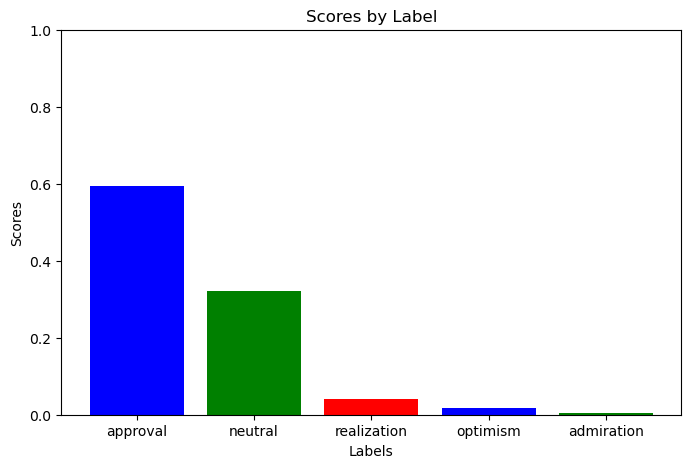

In [38]:
import matplotlib.pyplot as plt

data_slice = data[0:5]
labels = [item['label'] for item in data_slice]
scores = [item['score'] for item in data_slice]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'red'])
plt.xlabel('Labels')
plt.ylabel('Scores')
plt.title('Scores by Label')
plt.ylim(0, 1)
plt.show()